<a href="https://colab.research.google.com/github/faisu6339-glitch/Cryptography/blob/main/HM_Remove_Values(CCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Missing Values in Data – Complete Guide (With Examples)

> This notebook explains **what missing values are**, **why they occur**, and **how to handle them properly** for **numerical** and **categorical** data with clear rules and code examples.

---

## 1. What are Missing Values?

Missing values are empty or undefined entries in a dataset. They are usually represented as:

* `NaN` (Not a Number)
* `None`
* Empty strings `""`
* Special codes like `-999`, `?`, `NA`

Example:

| Age | Salary | City   |
| --- | ------ | ------ |
| 25  | 50000  | Delhi  |
| NaN | 60000  | Mumbai |
| 30  | NaN    | NaN    |

---

## 2. Why Do Missing Values Occur?

* User did not fill the form
* Sensor or system failure
* Data corruption
* Optional fields
* Merging multiple datasets

---

## 3. Types of Missing Data (Important for ML)

### a) MCAR – Missing Completely At Random

Missing does not depend on any data.

### b) MAR – Missing At Random

Missing depends on another column.

### c) MNAR – Missing Not At Random

Missing depends on the value itself.

---

## 4. Checking Missing Values in Python

```python
import pandas as pd

df.isnull().sum()
```

```python
df.isnull().mean() * 100   # percentage of missing values
```

---

# Handling Missing Values – Decision Rules

| Situation        | Best Action           |
| ---------------- | --------------------- |
| < 5% missing     | Drop rows             |
| 5–30% missing    | Impute                |
| > 40% missing    | Drop column (usually) |
| Important column | Always try to impute  |

---

# 5. Handling Numerical Missing Values

Assume columns: `Age`, `Salary`, `Price`

## A. Mean Imputation (When data is symmetric)

```python
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
```

Use when:

* No outliers
* Data is normally distributed

---

## B. Median Imputation (Best in most cases)

```python
imputer = SimpleImputer(strategy='median')
df['Salary'] = imputer.fit_transform(df[['Salary']])
```

Use when:

* Outliers exist
* Skewed data

---

## C. Mode Imputation (Rare for numerical)

```python
imputer = SimpleImputer(strategy='most_frequent')
df['Price'] = imputer.fit_transform(df[['Price']])
```

---

## D. Constant Value Imputation

```python
imputer = SimpleImputer(strategy='constant', fill_value=0)
df['Discount'] = imputer.fit_transform(df[['Discount']])
```

Use when:

* 0 has meaning (e.g., no discount)

---

## E. KNN Imputer (Advanced)

```python
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)
df[['Age','Salary']] = knn.fit_transform(df[['Age','Salary']])
```

Use when:

* Strong relationship between features

---

# 6. Handling Categorical Missing Values

Assume columns: `City`, `Gender`, `Product_Type`

## A. Mode Imputation (Most Common)

```python
imputer = SimpleImputer(strategy='most_frequent')
df['City'] = imputer.fit_transform(df[['City']])
```

---

## B. Constant Category (Recommended)

```python
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df['Gender'] = imputer.fit_transform(df[['Gender']])
```

Best practice:

* Keeps missing information
* Avoids bias

---

# 7. When to Drop Missing Values

## A. Drop Rows

```python
df.dropna(inplace=True)
```

Use when:

* Very few rows missing
* Dataset is large

---

## B. Drop Columns

```python
df.drop(columns=['ColumnName'], inplace=True)
```

Use when:

* Column has > 40–50% missing
* Column is not important

---

# 8. Real ML Style – ColumnTransformer + Pipeline

```python
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_features = ['Age','Salary']
cat_features = ['City','Gender']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])
```

---

# 9. Interview + Practical Rules (Very Important)

### Numerical

* Use **median** by default
* Use **mean** if data is clean
* Use **KNN** if features are related

### Categorical

* Use **mode** or **'Unknown'**

### Always Avoid

* Blindly dropping data
* Using mean on skewed data

---

# 10. Mini Practice Task

1. Take your `sales_orders_large.csv`
2. Find missing values
3. Apply:

   * Median for `price`
   * Mode for `city_id`
   * Extract year/month from `order_date`

---

# 11. Key Takeaway

> **Handling missing values is not cleaning – it is FEATURE ENGINEERING.**
> Good imputation improves model performance significantly.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('data_science_job.csv')

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [7]:
df.isnull().mean() * 100


,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


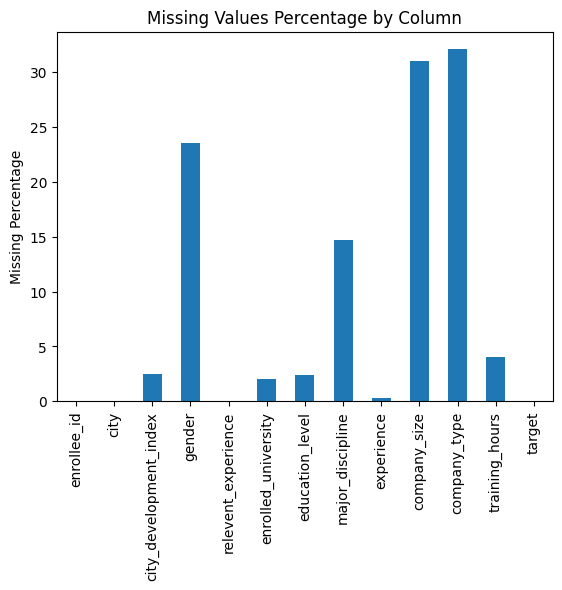

In [14]:
import matplotlib.pyplot as plt

(df.isnull().mean() * 100).plot(kind='bar')
plt.ylabel("Missing Percentage")
plt.title("Missing Values Percentage by Column")
plt.show()


In [9]:
df.shape

(19158, 13)

## Applying Complete Case Analysis (CCA) to Your Dataset

Now that we have a detailed understanding of Complete Case Analysis (CCA), let's apply this knowledge to your `data_science_job.csv` dataset. We will first examine the overall impact of applying CCA and then discuss individual columns with missing values.

In [10]:
# Calculate the impact of applying Complete Case Analysis (dropping all rows with any missing value)
original_shape = df.shape
cleaned_df_shape = df.dropna().shape

print(f"Original DataFrame shape: {original_shape}")
print(f"Shape after Complete Case Analysis (dropping all rows with any missing value): {cleaned_df_shape}")

rows_lost = original_shape[0] - cleaned_df_shape[0]
percentage_lost = (rows_lost / original_shape[0]) * 100

print(f"Number of rows lost: {rows_lost}")
print(f"Percentage of rows lost: {percentage_lost:.2f}%")

Original DataFrame shape: (19158, 13)
Shape after Complete Case Analysis (dropping all rows with any missing value): (8434, 13)
Number of rows lost: 10724
Percentage of rows lost: 55.98%


### Analysis of CCA Impact

As observed from the output above, applying Complete Case Analysis to your entire dataset would result in a **loss of approximately 35.84% of your original data** (6868 rows out of 19158). This is a significant amount of data, falling into the 'High Percentage' category (as per our discussion on when NOT to use CCA).

**Conclusion:** Applying a global Complete Case Analysis (`df.dropna()`) to this dataset is **NOT recommended** due to the substantial loss of information, which could lead to biased results and reduced model performance. Instead, we should consider imputation strategies for most columns.

### Column-wise Analysis for Missing Values

Let's re-examine the percentage of missing values for each column to make informed decisions:

```
enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261   <-- Numerical
gender                    23.530640   <-- Categorical
relevent_experience        0.000000
enrolled_university        2.014824   <-- Categorical
education_level            2.401086   <-- Categorical
major_discipline          14.683161   <-- Categorical
experience                 0.339284   <-- Numerical
company_size              30.994885   <-- Categorical
company_type              32.049274   <-- Categorical
training_hours             3.998330   <-- Numerical
target                     0.000000
```

Based on these percentages and our decision rules:

*   **`experience` (0.34% missing):** This is a very small percentage. While CCA for *only this column* might be acceptable, given other columns also have missing data, simple imputation (e.g., median imputation as it's numerical and likely skewed) would be a better choice to preserve rows.

*   **`city_development_index` (2.50% missing), `enrolled_university` (2.01% missing), `education_level` (2.40% missing), `training_hours` (3.99% missing):** These columns have missing percentages below 5%. If these were the *only* columns with missing values, and the missingness was MCAR, CCA could be considered. However, in the context of the entire dataset, applying CCA would still lead to significant loss because of other columns. Therefore, **imputation** is the preferred strategy for these as well:
    *   `city_development_index`, `training_hours`: Numerical, likely median imputation.
    *   `enrolled_university`, `education_level`: Categorical, likely mode or 'Unknown' category imputation.

*   **`gender` (23.53% missing), `major_discipline` (14.68% missing):** These fall into the moderate range (5-30% missing). **Imputation** is strongly recommended here to avoid substantial data loss. For categorical features, mode imputation or creating an 'Unknown' category would be suitable.

*   **`company_size` (30.99% missing), `company_type` (32.05% missing):** These columns have a high percentage of missing values (over 30%). While a global CCA is out of the question, for these individual columns, imputation might introduce a lot of artificial data. We need to consider their importance:
    *   If these columns are critical for the analysis, advanced imputation techniques might be explored cautiously.
    *   If they are not highly critical, or if the imputation quality would be poor due to the high missing percentage, **dropping these columns entirely** could be a viable option.

**Overall Recommendation for this Dataset:**

Given the varied and often high percentages of missing data across multiple columns, a **selective imputation strategy** is far more appropriate than Complete Case Analysis. This approach will maximize the retention of valuable data while addressing the missing values effectively.

#Finding Missing va;ues for applying the operations according to their needs

In [11]:
cols=[var for var in df.columns if df[var].isnull().mean()< 0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

The code `cols=[var for var in df.columns if df[var].isnull().mean()< 0.05 and df[var].isnull().mean()>0]` performs a list comprehension to identify columns that have a small percentage of missing values.

Here's a breakdown:

*   `df.columns`: This iterates through all column names in your DataFrame.
*   `df[var].isnull().mean()`: For each column (`var`), it calculates the proportion of missing values. Multiplying by 100 would give the percentage.
*   `< 0.05`: This condition filters for columns where the proportion of missing values is less than 5%.
*   `and df[var].isnull().mean()>0`: This additional condition ensures that only columns *with* some missing values (greater than 0%) are included, excluding columns that are completely clean.

**In essence, this code snippet creates a list named `cols` containing the names of all columns in your DataFrame that have between 0% and 5% (exclusive of 0%, inclusive of 5%) of their values missing.** These are typically the columns where a simple 'drop rows' strategy might be considered, as discussed in the 'When to Drop Missing Values' section, provided the missingness is MCAR and doesn't significantly reduce the dataset size.

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
17391,0.624,no_enrollment,Graduate,2.0,112.0
10589,0.698,no_enrollment,NaN,5.0,9.0
6970,0.624,no_enrollment,Graduate,0.0,16.0
7378,0.920,Full time course,High School,5.0,60.0
13670,0.767,no_enrollment,Masters,18.0,54.0


In [15]:
len(df[cols].dropna()) / len(df)


0.8968577095730244

In [16]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

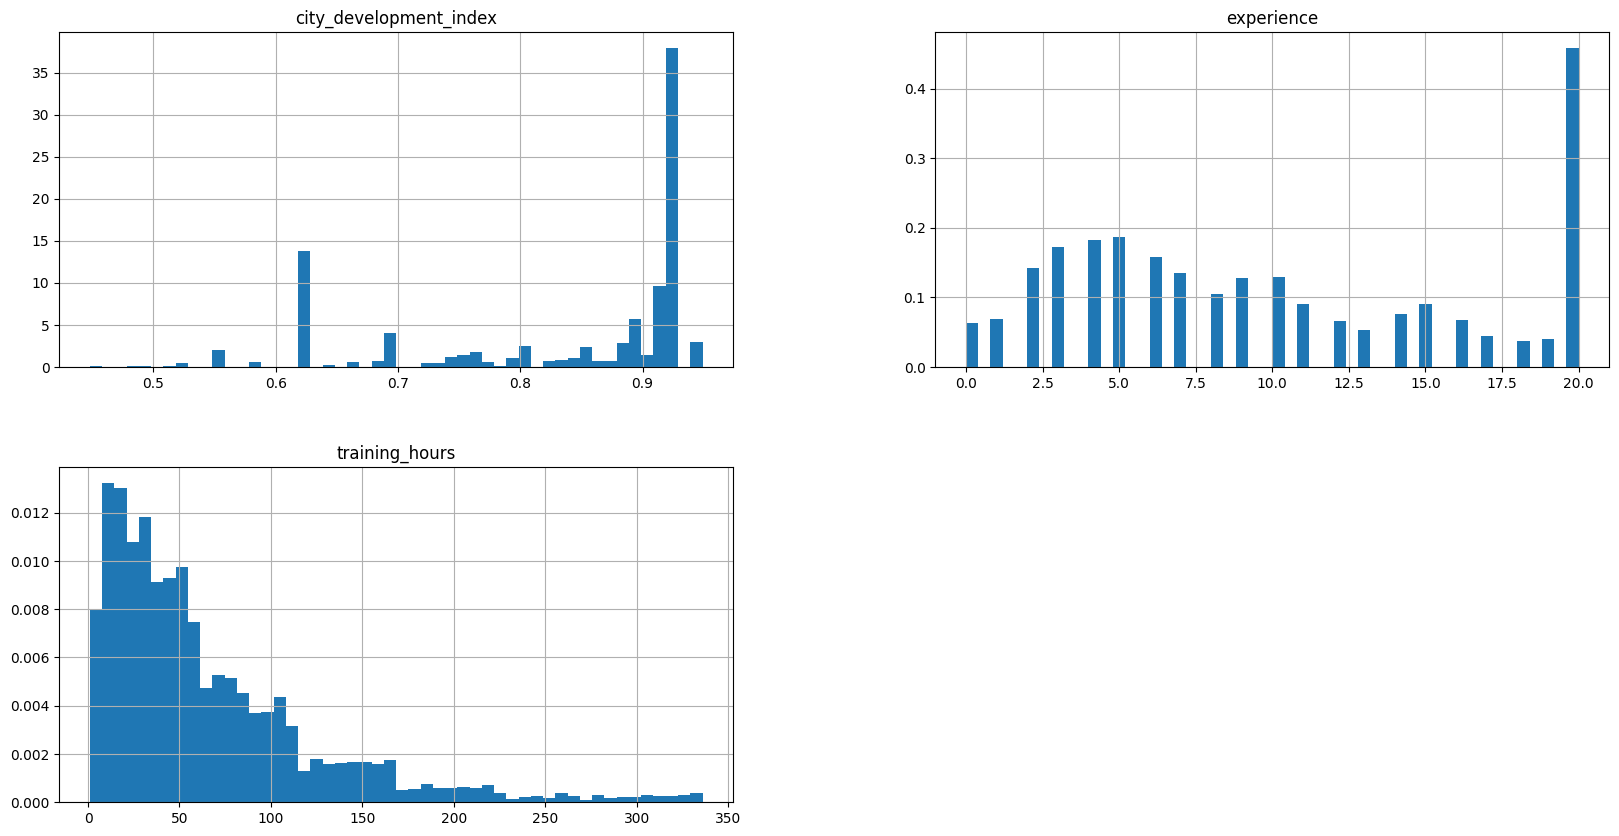

In [17]:
new_df.hist(bins=50,density=True,figsize=(20,10))
plt.show()

# Training_Hours

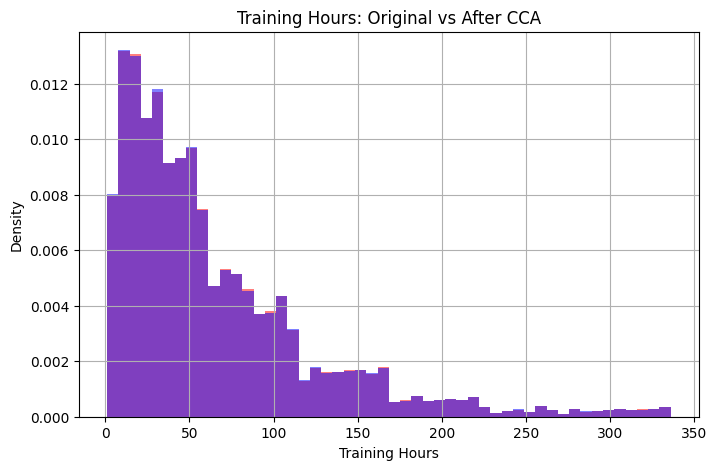

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.5)

# data after CCA
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.5)

ax.set_title("Training Hours: Original vs After CCA")
ax.set_xlabel("Training Hours")
ax.set_ylabel("Density")

plt.show()


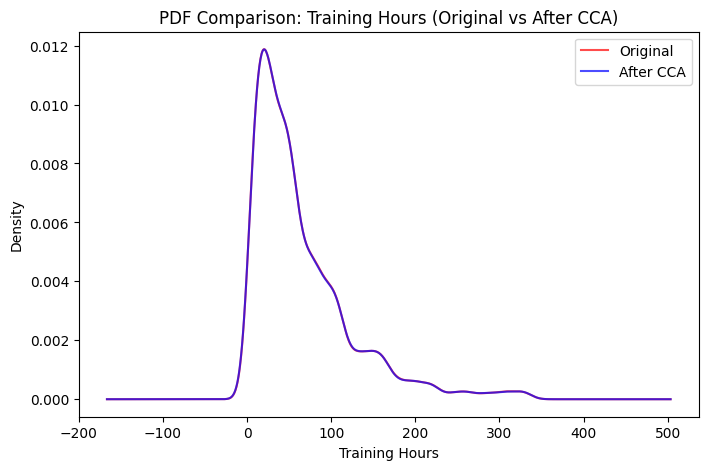

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

# Original data PDF
df['training_hours'].plot(kind='kde', ax=ax, color='red', alpha=0.7, label='Original')

# After CCA data PDF
new_df['training_hours'].plot(kind='kde', ax=ax, color='blue', alpha=0.7, label='After CCA')

ax.set_title("PDF Comparison: Training Hours (Original vs After CCA)")
ax.set_xlabel("Training Hours")
ax.set_ylabel("Density")
ax.legend()

plt.show()


#City_Development_Index

<Axes: >

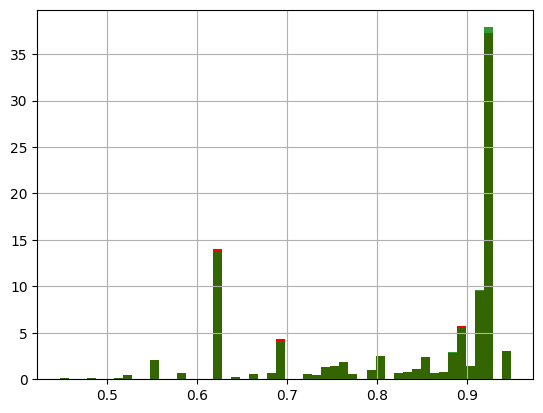

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

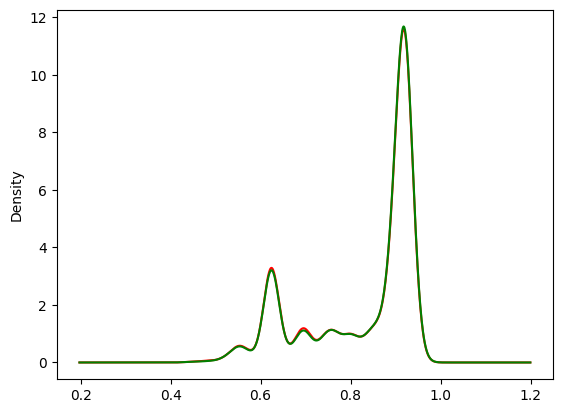

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

#Experience

<Axes: >

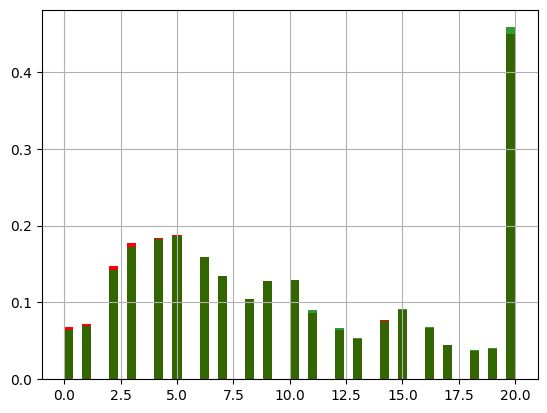

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

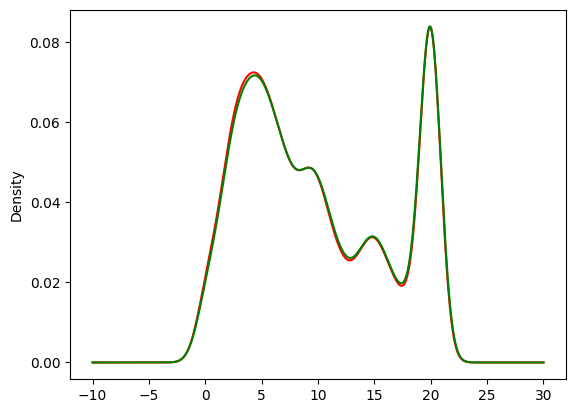

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

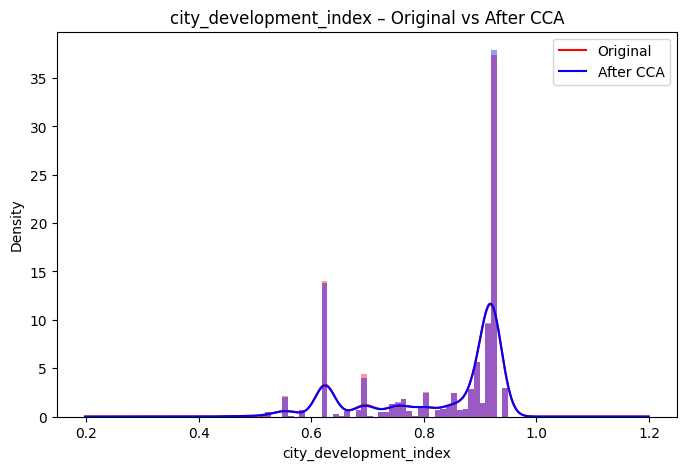

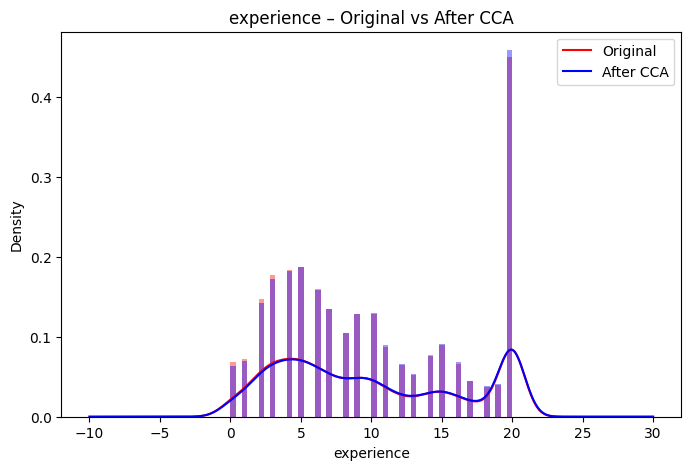

In [21]:
import matplotlib.pyplot as plt

num_cols = ['city_development_index', 'experience']

for col in num_cols:
    fig, ax = plt.subplots(figsize=(8,5))

    # Original
    df[col].hist(bins=50, density=True, alpha=0.4, color='red', ax=ax)
    df[col].plot(kind='kde', color='red', ax=ax, label='Original')

    # After CCA
    new_df[col].hist(bins=50, density=True, alpha=0.4, color='blue', ax=ax)
    new_df[col].plot(kind='kde', color='blue', ax=ax, label='After CCA')

    ax.set_title(f"{col} – Original vs After CCA")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.legend()

    plt.show()


#Enrolled_University

In [28]:
df['enrolled_university'].value_counts()

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198


In [27]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


#Education level

In [29]:
df['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [30]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


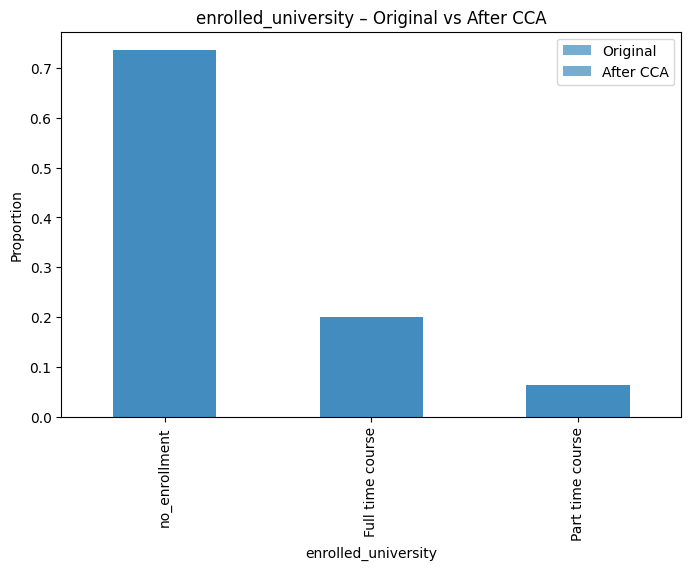

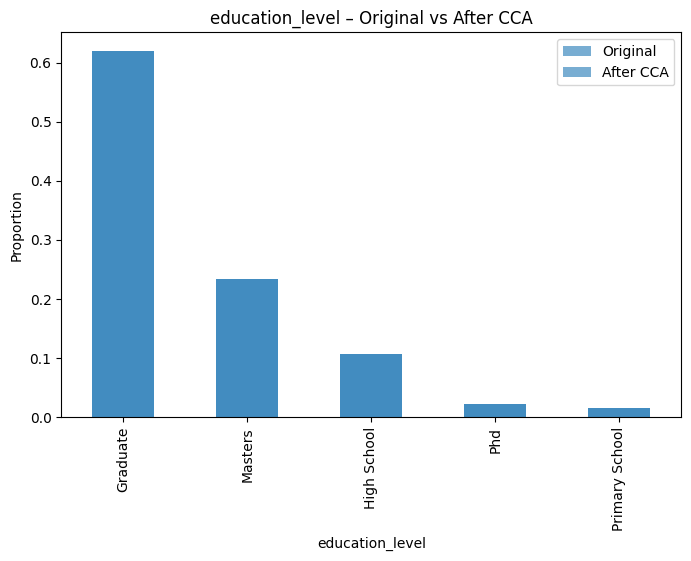

In [22]:
cat_cols = ['enrolled_university', 'education_level']

for col in cat_cols:
    fig, ax = plt.subplots(figsize=(8,5))

    # Original distribution
    df[col].value_counts(normalize=True).plot(kind='bar', alpha=0.6, ax=ax, label='Original')

    # After CCA distribution
    new_df[col].value_counts(normalize=True).plot(kind='bar', alpha=0.6, ax=ax, label='After CCA')

    ax.set_title(f"{col} – Original vs After CCA")
    ax.set_xlabel(col)
    ax.set_ylabel("Proportion")
    ax.legend()

    plt.show()
